### パラメータ推定 d1 and s1 

In [1]:
# maskの方の関数を使う

In [2]:
include("../../src/function/smoothing_main_function.jl");

In [3]:
using NPZ

@time cov_mat_scal = npzread("../../covariance_matrix/smoothing_cov_mat_scal.npy")
@time cov_mat_tens = npzread("../../covariance_matrix/smoothing_cov_mat_tens.npy");

  0.065567 seconds (155.17 k allocations: 12.724 MiB, 95.49% compilation time)
  0.001380 seconds (48 allocations: 2.254 MiB)


### パラメータセット

In [4]:
nside = 4
r =0.;

In [5]:
# litebirdの周波数を選んで
# 色々なバンドで試す

freq_band_case1 = [40, 60, 140, 235, 280, 337]
freq_band_case2 = [40, 60, 140, 235, 337, 402]

which_model = "d1 and s1"
cmb_freq = 140;

In [6]:
# スレッドセーフな計算 push!は使うな

times = 1000

r_array_case1 = zeros(times)
r_array_case2 = zeros(times)

beta_s_array_case1 = zeros(times)
beta_s_array_case2 = zeros(times)

beta_d_array_case1 = zeros(times)
beta_d_array_case2 = zeros(times)

T_d_array_case1 = zeros(times)
T_d_array_case2 = zeros(times)

accuracy_r, accuracy_like = 1e-5, 1e-2

@time @inbounds for seed in 1:times

    # r_ini, num_iterations, accuracy_r, accuracy_like, random_seed_cmb, seed_syn, nside, r_input, freq_band, which_model, cmb_freq, cov_mat_scal, cov_mat_tens
    r_array, beta_s_array, beta_d_array, T_d_array, optimum_r1, optimum_beta_s1, optimum_beta_d1, optimum_T_d1 = minimize_r_like_estimate_fast(0.001, 2, accuracy_r, accuracy_like, seed-1, seed-1, nside, r, freq_band_case1, which_model, 140, cov_mat_scal, cov_mat_tens);
    r_array, beta_s_array, beta_d_array, T_d_array, optimum_r2, optimum_beta_s2, optimum_beta_d2, optimum_T_d2 = minimize_r_like_estimate_fast(0.001, 2, accuracy_r, accuracy_like, seed-1, seed-1, nside, r, freq_band_case2, which_model, 140, cov_mat_scal, cov_mat_tens);
    
    # case1 [40, 50, 100, 140, 280, 402]
    r_array_case1[seed] = optimum_r1
    beta_s_array_case1[seed] = optimum_beta_s1
    beta_d_array_case1[seed] = optimum_beta_d1
    T_d_array_case1[seed] = optimum_T_d1

    # case2 [40, 50, 100, 140, 340, 402]
    r_array_case2[seed] = optimum_r2
    beta_s_array_case2[seed] = optimum_beta_s2
    beta_d_array_case2[seed] = optimum_beta_d2
    T_d_array_case2[seed] = optimum_T_d2
    
    #print(seed)

end

5423.689971 seconds (474.45 M allocations: 2.612 TiB, 1.08% gc time, 0.04% compilation time: 3% of which was recompilation)


sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


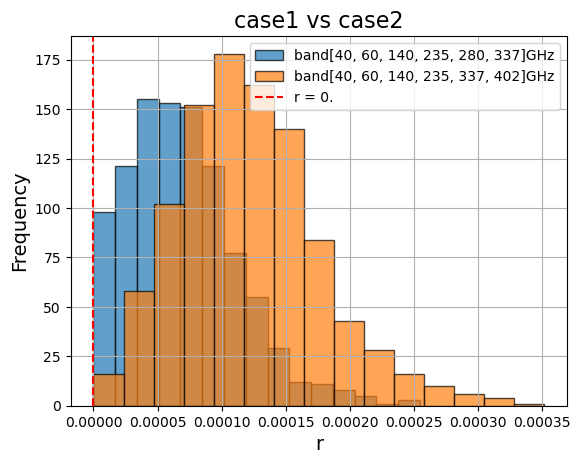

In [7]:
using PyPlot 

# histogram
hist(r_array_case1, bins = 15, alpha = 0.7, edgecolor = "black", label = string( "band", freq_band_case1, "GHz"))
hist(r_array_case2, bins = 15, alpha = 0.7, edgecolor = "black", label = string( "band", freq_band_case2, "GHz"))

# r = 0.
PyPlot.axvline(x = 0., color = "red", linestyle = "--", label = "r = 0.")

title("case1 vs case2", fontsize = 16)
xlabel("r", fontsize = 14)
ylabel("Frequency", fontsize = 14)
PyPlot.grid(true)
PyPlot.legend()

# figure/parameter_estimate　に保存
savefig("../../figure/parameter_estimate/smoothing/d1_s1/r=0_r.png")

show()

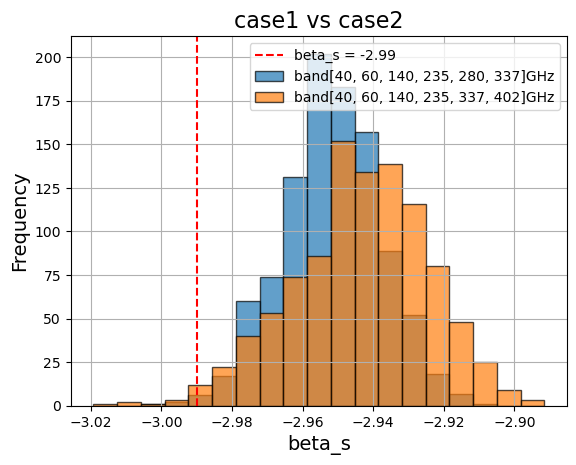

In [17]:
using PyPlot 

min_range = minimum([beta_s_array_case1; beta_s_array_case2])
max_range = maximum([beta_s_array_case1; beta_s_array_case2])
bins = range(min_range, stop = max_range, length=20)

# beta_s = -2.99
PyPlot.axvline(x = -2.99, color = "red", linestyle = "--", label = "beta_s = -2.99")

# histogram
hist(beta_s_array_case1, bins = bins, alpha = 0.7, edgecolor = "black", label = string( "band", freq_band_case1, "GHz"))
hist(beta_s_array_case2, bins = bins, alpha = 0.7, edgecolor = "black", label = string( "band", freq_band_case2, "GHz"))

title("case1 vs case2", fontsize = 16)
xlabel("beta_s", fontsize = 14)
ylabel("Frequency", fontsize = 14)
PyPlot.grid(true)
PyPlot.legend()

show()

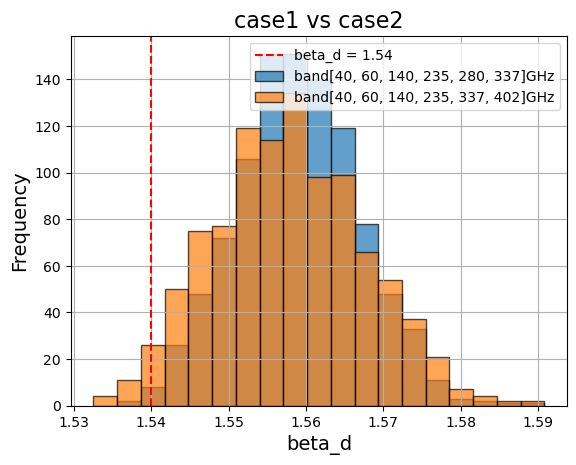

In [30]:
using PyPlot 

min_range = minimum([beta_d_array_case1; beta_d_array_case2])
max_range = maximum([beta_d_array_case1; beta_d_array_case2])
bins = range(min_range, stop = max_range, length=20)


# beta_d = 1.54
PyPlot.axvline(x = 1.54, color = "red", linestyle = "--", label = "beta_d = 1.54")

# histogram
hist(beta_d_array_case1, bins = bins, alpha = 0.7, edgecolor = "black", label = string( "band", freq_band_case1, "GHz"))
hist(beta_d_array_case2, bins = bins, alpha = 0.7, edgecolor = "black", label = string( "band", freq_band_case2, "GHz"))

title("case1 vs case2", fontsize = 16)
xlabel("beta_d", fontsize = 14)
ylabel("Frequency", fontsize = 14)
PyPlot.grid(true)
PyPlot.legend()

show()

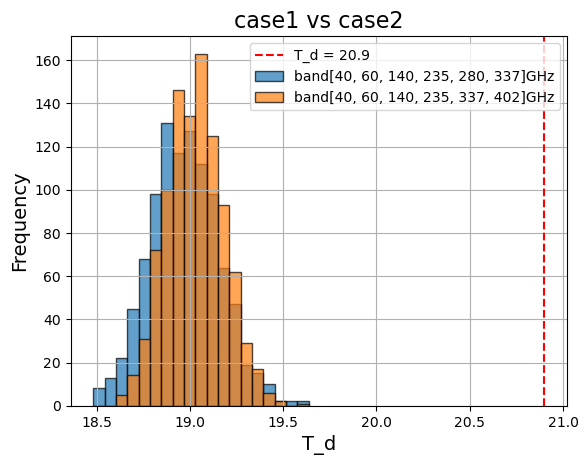

In [20]:
using PyPlot 

min_range = minimum([T_d_array_case1; T_d_array_case2])
max_range = maximum([T_d_array_case1; T_d_array_case2])
bins = range(min_range, stop = max_range, length=20)

# T_d = 20.9
PyPlot.axvline(x = 20.9, color = "red", linestyle = "--", label = "T_d = 20.9")


# histogram
hist(T_d_array_case1, bins = bins, alpha = 0.7, edgecolor = "black", label = string( "band", freq_band_case1, "GHz"))
hist(T_d_array_case2, bins = bins, alpha = 0.7, edgecolor = "black", label = string( "band", freq_band_case2, "GHz"))

title("case1 vs case2", fontsize = 16)
xlabel("T_d", fontsize = 14)
ylabel("Frequency", fontsize = 14)
PyPlot.grid(true)
PyPlot.legend()

show()

In [21]:
std(r_array_case1) * 1.96
std(r_array_case2) * 1.96

0.00010780284293074115

In [22]:
# 68%CL Δr
println("Δr_case1 =", std(r_array_case1))
println("Δr_case2 =", std(r_array_case2))

Δr_case1 =4.343405748305829e-5
Δr_case2 =5.5001450474867936e-5


In [23]:
# 68%CL Δbeta_s
println("Δbeta_s_case1 =", std(beta_s_array_case1))
println("Δbeta_s_case2 =", std(beta_s_array_case2))

Δbeta_s_case1 =0.013973207389854499
Δbeta_s_case2 =0.019071117583314357


In [24]:
# 68%CL Δbeta_d
println("Δbeta_d_case1 =", std(beta_d_array_case1))
println("Δbeta_d_case2 =", std(beta_d_array_case2))

Δbeta_d_case1 =0.007961960025181554
Δbeta_d_case2 =0.009671100725725384


In [25]:
# 68%CL ΔT_d
println("ΔT_d_case1 =", std(T_d_array_case1))
println("ΔT_d_case2 =", std(T_d_array_case2))

ΔT_d_case1 =0.18509570355467167
ΔT_d_case2 =0.1523493462734812


In [26]:
println("case1 r = ", mean(r_array_case1))
println("case2 r = ", mean(r_array_case2))

case1 r = 6.939913902371035e-5
case2 r = 0.00012121124389897167


In [27]:
println("case1 beta_s = ", mean(beta_s_array_case1))
println("case2 beta_s = ", mean(beta_s_array_case2))

case1 beta_s = -2.9518724916620327
case2 beta_s = -2.9435130677848615


In [28]:
println("case1 beta_d = ", mean(beta_d_array_case1))
println("case2 beta_d = ", mean(beta_d_array_case2))

case1 beta_d = 1.5590108021336915
case2 beta_d = 1.5578224992497784


In [29]:
println("case1 T_d = ", mean(T_d_array_case1))
println("case2 T_d = ", mean(T_d_array_case2))

case1 T_d = 18.97129586351672
case2 T_d = 19.027725993642026
